In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0,10,100000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_data = (0.5*x_data)+5+noise

In [5]:
x_dataf= pd.DataFrame(x_data,columns=['x'])

In [7]:
y_dataf = pd.DataFrame(y_data,columns=['y'])

In [8]:
data= pd.concat([x_dataf,y_dataf],axis=1)

In [9]:
data.head()

,x,y
0,0.0000,3.653211
1,0.0001,6.242992
2,0.0002,4.613724
3,0.0003,6.168098
4,0.0004,4.872196


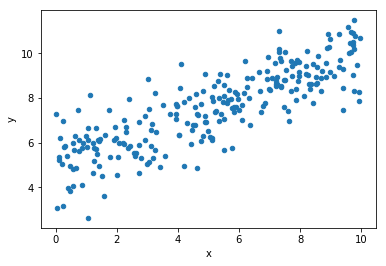

In [10]:
data.sample(250).plot(kind='scatter',x='x',y='y')

In [11]:
import tensorflow as tf

/home/userhadoop/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [26]:
batch_size=20

In [27]:
m=tf.Variable(0.72)
c=tf.Variable(0.30)

In [28]:
phx = tf.placeholder(dtype=tf.float32,shape=[batch_size])
phy= tf.placeholder(dtype=tf.float32,shape=[batch_size])

In [29]:
y_model = m*phx + c

In [30]:
error = tf.reduce_sum(tf.square(phy-y_model))

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [36]:
train = optimizer.minimize(error)

In [37]:
init= tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 1000
    
    for i in range(epochs):
        rand_index = np.random.randint(len(x_data),size=batch_size)
        
        feed= {phx:x_data[rand_index],phy:y_data[rand_index]}
        
        sess.run(train,feed_dict=feed)
    slope,intercept = sess.run([m,c])

In [39]:
intercept

5.0098805

In [40]:
slope

0.50720674

In [48]:
y_hat = slope*x_data + intercept

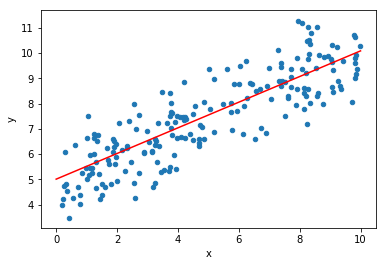

In [50]:
data.sample(n=200).plot(kind='scatter',x='x',y='y')
plt.plot(x_data,y_hat,color='r')